# Split California housing data

In [1]:
import pandas as pd
import os
import numpy as np

# matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
HOUSING_DATA_DIR = "raw_data"

In [3]:
def load_housing_data(housing_path, data_type):
    csv_path = os.path.join(housing_path, "raw_cali_housing_"+data_type+".csv")
    return pd.read_csv(csv_path)

In [4]:
# view sample housing data
housing = load_housing_data(HOUSING_DATA_DIR, "train")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


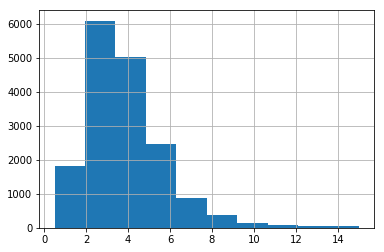

In [5]:
housing["median_income"].hist()

In [6]:
# create income category attribute
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].value_counts() / len(housing)

3.0    0.348176
2.0    0.318412
4.0    0.178176
5.0    0.116176
1.0    0.039059
Name: income_cat, dtype: float64

In [7]:
# stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_valid_set = housing.loc[test_index]

In [8]:
# remove `income_cat` so the data is back to original state
for dset in (strat_train_set, strat_valid_set):
    dset.drop("income_cat", axis=1, inplace=True)

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 693 to 11489
Data columns (total 9 columns):
longitude             13600 non-null float64
latitude              13600 non-null float64
housing_median_age    13600 non-null float64
total_rooms           13600 non-null float64
total_bedrooms        13600 non-null float64
population            13600 non-null float64
households            13600 non-null float64
median_income         13600 non-null float64
median_house_value    13600 non-null float64
dtypes: float64(9)
memory usage: 1.0 MB


In [10]:
strat_valid_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 8774 to 873
Data columns (total 9 columns):
longitude             3400 non-null float64
latitude              3400 non-null float64
housing_median_age    3400 non-null float64
total_rooms           3400 non-null float64
total_bedrooms        3400 non-null float64
population            3400 non-null float64
households            3400 non-null float64
median_income         3400 non-null float64
median_house_value    3400 non-null float64
dtypes: float64(9)
memory usage: 265.6 KB


In [11]:
strat_train_set.to_csv("./raw_data/split_train.csv")

In [13]:
strat_valid_set.to_csv("./raw_data/split_valid.csv")